# Linear Regression with Singapore Airbnb Data

Import required packages

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sb
pd.options.display.float_format = '{:.5f}'.format
import warnings
import math
import scipy.stats as stats
import scipy
from sklearn.preprocessing import scale
warnings.filterwarnings('ignore')

Load & profile the data

In [4]:
data = pd.read_csv("SingaporeAirBnb.csv")
print(data.dtypes)
print(data.isna().values.any())

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object
True


In [7]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

Visualize data using histogram

      id  host_id  host_name  longitude  price  minimum_nights  \
0  49091   266763  Francesca  103.79580     83             180   
1  50646   227796    Sujatha  103.78521     81              90   
2  56334   266763  Francesca  103.79667     69               6   
3  71609   367042    Belinda  103.95712    206               1   
4  71896   367042    Belinda  103.95963     94               1   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  
0                  1            0.01000                               2  
1                 18            0.28000                               1  
2                 20            0.20000                               2  
3                 14            0.15000                               9  
4                 22            0.22000                               9  


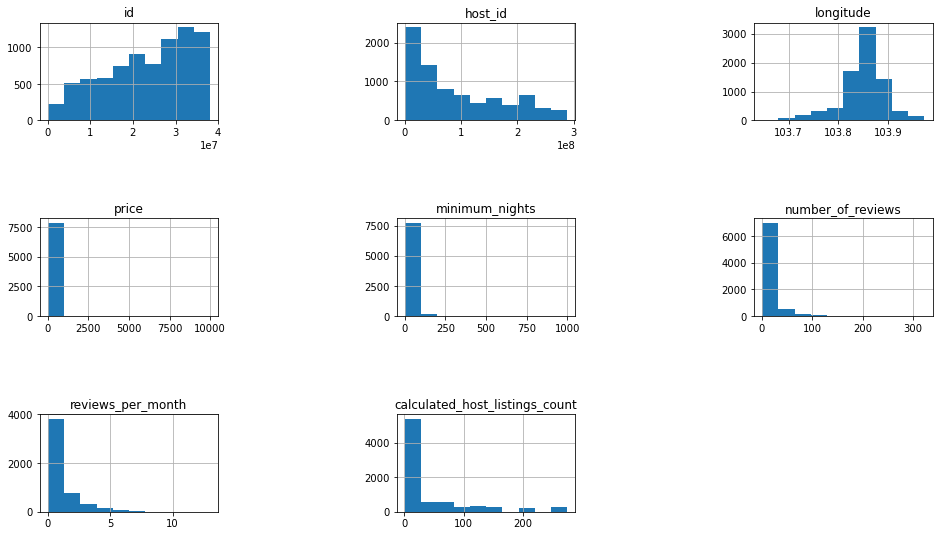

In [11]:
newData = data[["id", "host_id", "host_name", "longitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count"]]
print(newData.head())
newData.hist()
plt.subplots_adjust(hspace = 1, wspace = 1)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

Checking missing values (is there empty cell on dataset?)

In [20]:
data.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

I will be excluding reviews_per_month because there seems to be empty cells in the data.

Visualize the data (scatter)

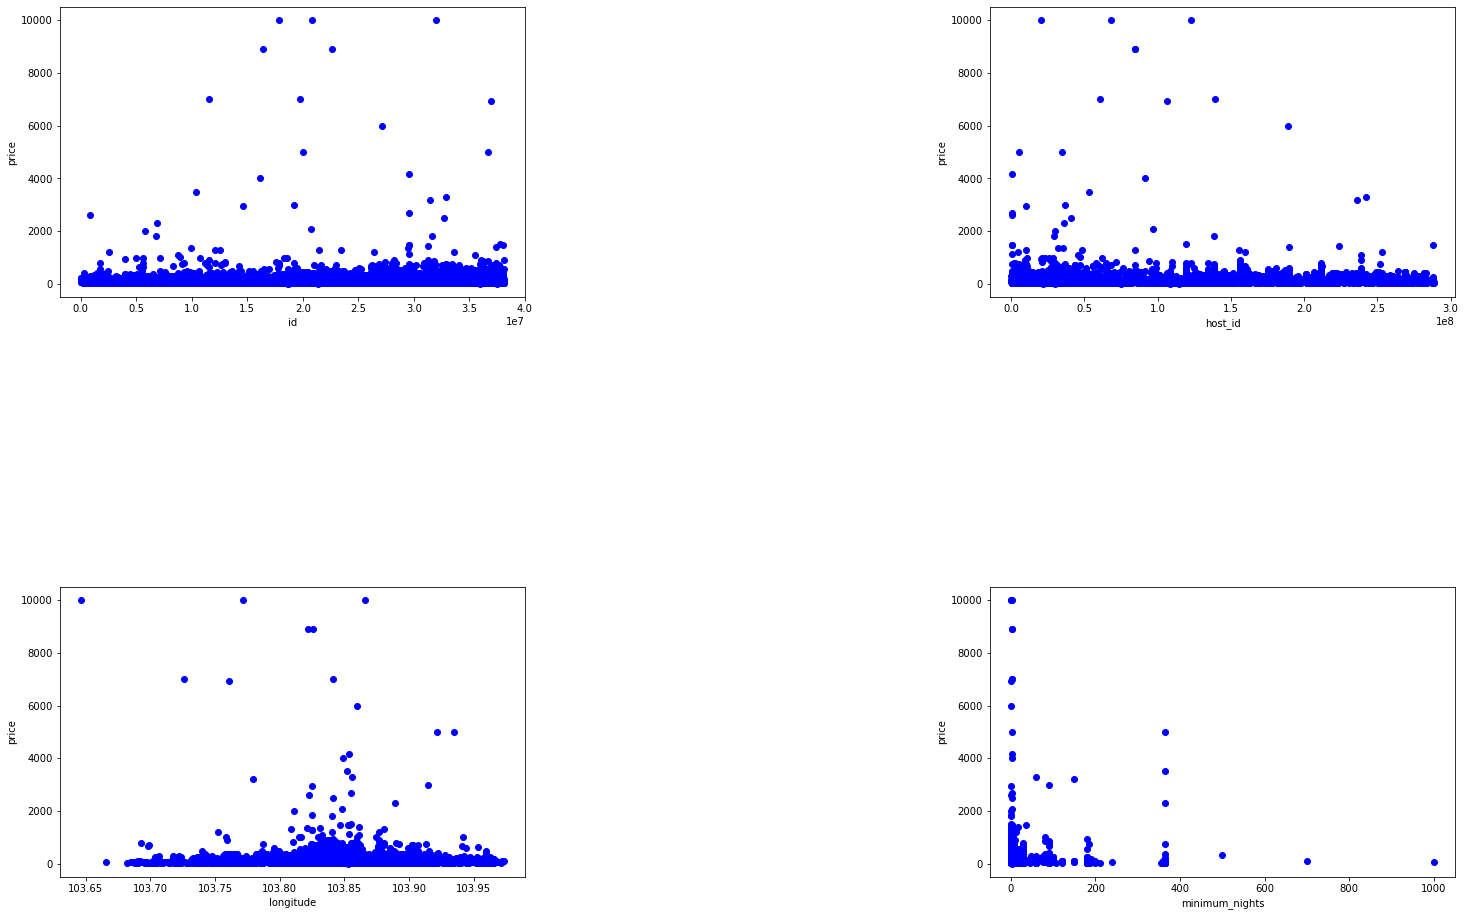

In [24]:
plt.subplot(221)
plt.scatter(newData["id"], newData["price"], color="blue")
plt.xlabel("id")
plt.ylabel("price")

plt.subplot(222)
plt.scatter(newData["host_id"], newData["price"], color="blue")
plt.xlabel("host_id")
plt.ylabel("price")

plt.subplot(223)
plt.scatter(newData["longitude"], newData["price"], color="blue")
plt.xlabel("longitude")
plt.ylabel("price")

plt.subplot(224)
plt.scatter(newData["minimum_nights"], newData["price"], color="blue")
plt.xlabel("minimum_nights")
plt.ylabel("price")

plt.subplots_adjust(hspace = 1, wspace = 1)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

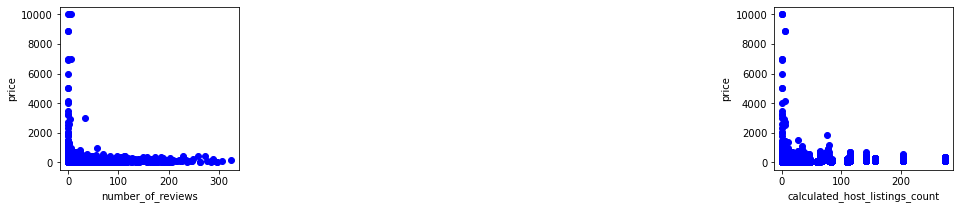

In [25]:
plt.subplot(231)
plt.scatter(newData["number_of_reviews"], newData["price"], color="blue")
plt.xlabel("number_of_reviews")
plt.ylabel("price")

plt.subplot(233)
plt.scatter(newData["calculated_host_listings_count"], newData["price"], color="blue")
plt.xlabel("calculated_host_listings_count")
plt.ylabel("price")

plt.subplots_adjust(hspace = 1, wspace = 1)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

In [28]:
y = data["price"]
x = data[["id", "host_id", "longitude", "minimum_nights", "number_of_reviews", "calculated_host_listings_count"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 234)
print('Training Data Count: {}'.format(x_train.shape[0]))
print('Testing Data Count: {}'.format(x_test.shape[0]))
x_train = sm.add_constant(x_train)
result = sm.OLS(y_train, x_train).fit()
result.summary()

Training Data Count: 6325
Testing Data Count: 1582


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     4.869
Date:                Sat, 11 Dec 2021   Prob (F-statistic):           5.68e-05
Time:                        17:26:02   Log-Likelihood:                -45369.
No. Observations:                6325   AIC:                         9.075e+04
Df Residuals:                    6318   BIC:                         9.080e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           1.789e+04   9598.319      1.864      0.062    -924.996    3.67e+04
id                              9.825e-07   5.13e-07      1.914      0.056   -2.39e-08    1.99e-06
host_id                         6.499e-08   6.01e-08      1.081      0.280   -5.29e-08    1.83e-07
longitude                       -170.8993     92.430     -1.849      0.065    -352.093      10.294
minimum_nights                    -0.1551      0.097     -1.596      0.111      -0.346       0.035
number_of_reviews                 -0.2627      0.141     -1.868      0.062      -0.538       0.013
calculated_host_listings_count     0.0439      0.065      0.672      0.502      -0.084       0.172
==============================================================================
Omnibus:                    13519.173   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         57651251.408
Skew:                          18.846   Prob(JB):                         0.00
Kurtosis:                     469.192   Cond. No.                     3.00e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  3e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Pada kesempatan kali ini, saya akan menggunakan data yang memiliki p-value kurang dari 0.1 (minimal 90% berkaitan dengan price). Jadi, data yang kita anggap paling berpengaruh terhadap price adalah id, longitude, dan number_of_reviews. Dalam model ini, jika menggunakan regresi linear, hanya 0.4% dari variasi data yang dapat dijelaskan (model yang jelek).

Regresi linear dengan hanya menggunakan variabel id, longitude, dan number_of_reviews.

In [33]:
x2 = data[["id", "longitude", "number_of_reviews"]]
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y, test_size = 0.2, random_state = 234)
print('Training Data Count:', x2_train.shape[0])
print('Testing Data Count:', x2_test.shape[0])
x2_train = sm.add_constant(x2_train)
results2 = sm.OLS(y2_train, x2_train).fit()
results2.summary()

Training Data Count: 6325
Testing Data Count: 1582


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     8.382
Date:                Sat, 11 Dec 2021   Prob (F-statistic):           1.47e-05
Time:                        17:37:48   Log-Likelihood:                -45371.
No. Observations:                6325   AIC:                         9.075e+04
Df Residuals:                    6321   BIC:                         9.078e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.745e+04   9580.708      1.822      0.069   -1329.345    3.62e+04
id                 1.411e-06   4.14e-07      3.410      0.001       6e-07    2.22e-06
longitude          -166.7238     92.260     -1.807      0.071    -347.585      14.138
number_of_reviews    -0.2434      0.139     -1.746      0.081      -0.517       0.030
==============================================================================
Omnibus:                    13508.477   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         57432646.144
Skew:                          18.811   Prob(JB):                         0.00
Kurtosis:                     468.307   Cond. No.                     6.13e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.13e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Semua p-value sudah kurang dari 0.1. Tapi, masih bisa lebih precise/tepat lagi. Yaitu dengan cara mencari p-value yang kurang dari 0.5 (minimal kemungkinan 95% adanya relasi dengan price). Saya akan melakukan percobaan ketiga dengan hanya menggunakan variabel id.

In [39]:
x3 = data[["id"]]
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y, test_size = 0.2, random_state = 234)
print('Training Data Count:', x3_train.shape[0])
print('Testing Data Count:', x3_test.shape[0])
x3_train = sm.add_constant(x3_train)
results3 = sm.OLS(y3_train, x3_train).fit()
results3.summary()

Training Data Count: 6325
Testing Data Count: 1582


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     18.06
Date:                Sat, 11 Dec 2021   Prob (F-statistic):           2.17e-05
Time:                        17:52:28   Log-Likelihood:                -45374.
No. Observations:                6325   AIC:                         9.075e+04
Df Residuals:                    6323   BIC:                         9.077e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        129.0400      9.902     13.031      0.000     109.628     148.452
id          1.658e-06    3.9e-07      4.250      0.000    8.93e-07    2.42e-06
==============================================================================
Omnibus:                    13516.157   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         57563601.855
Skew:                          18.837   Prob(JB):                         0.00
Kurtosis:                     468.837   Cond. No.                     6.33e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.33e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Kali ini, p-value nya sudah 0 (artinya id 100% berhubungan dengan price). Sayangnya R^2 nya masih 0.003, yang berarti model ini hanya dapat menjelaskan 0.3% dari variasi yang ada.

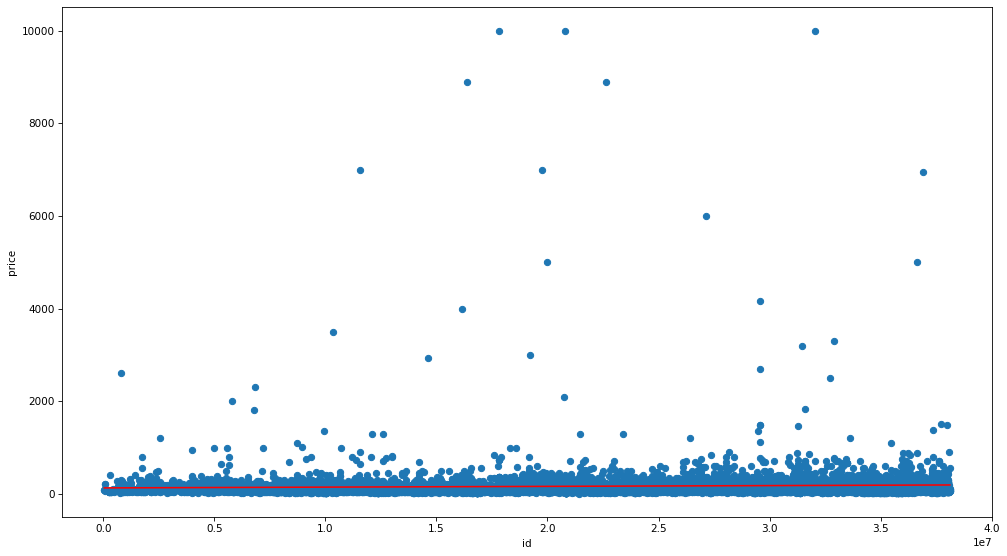

In [42]:
plt.figure(dpi = 75)
plt.scatter(data["id"], data["price"])
plt.plot(data[["id"]], results3.params[1] * data[["id"]] + results3.params[0], '-r')
plt.xlabel("id")
plt.ylabel("price")
plt.show()

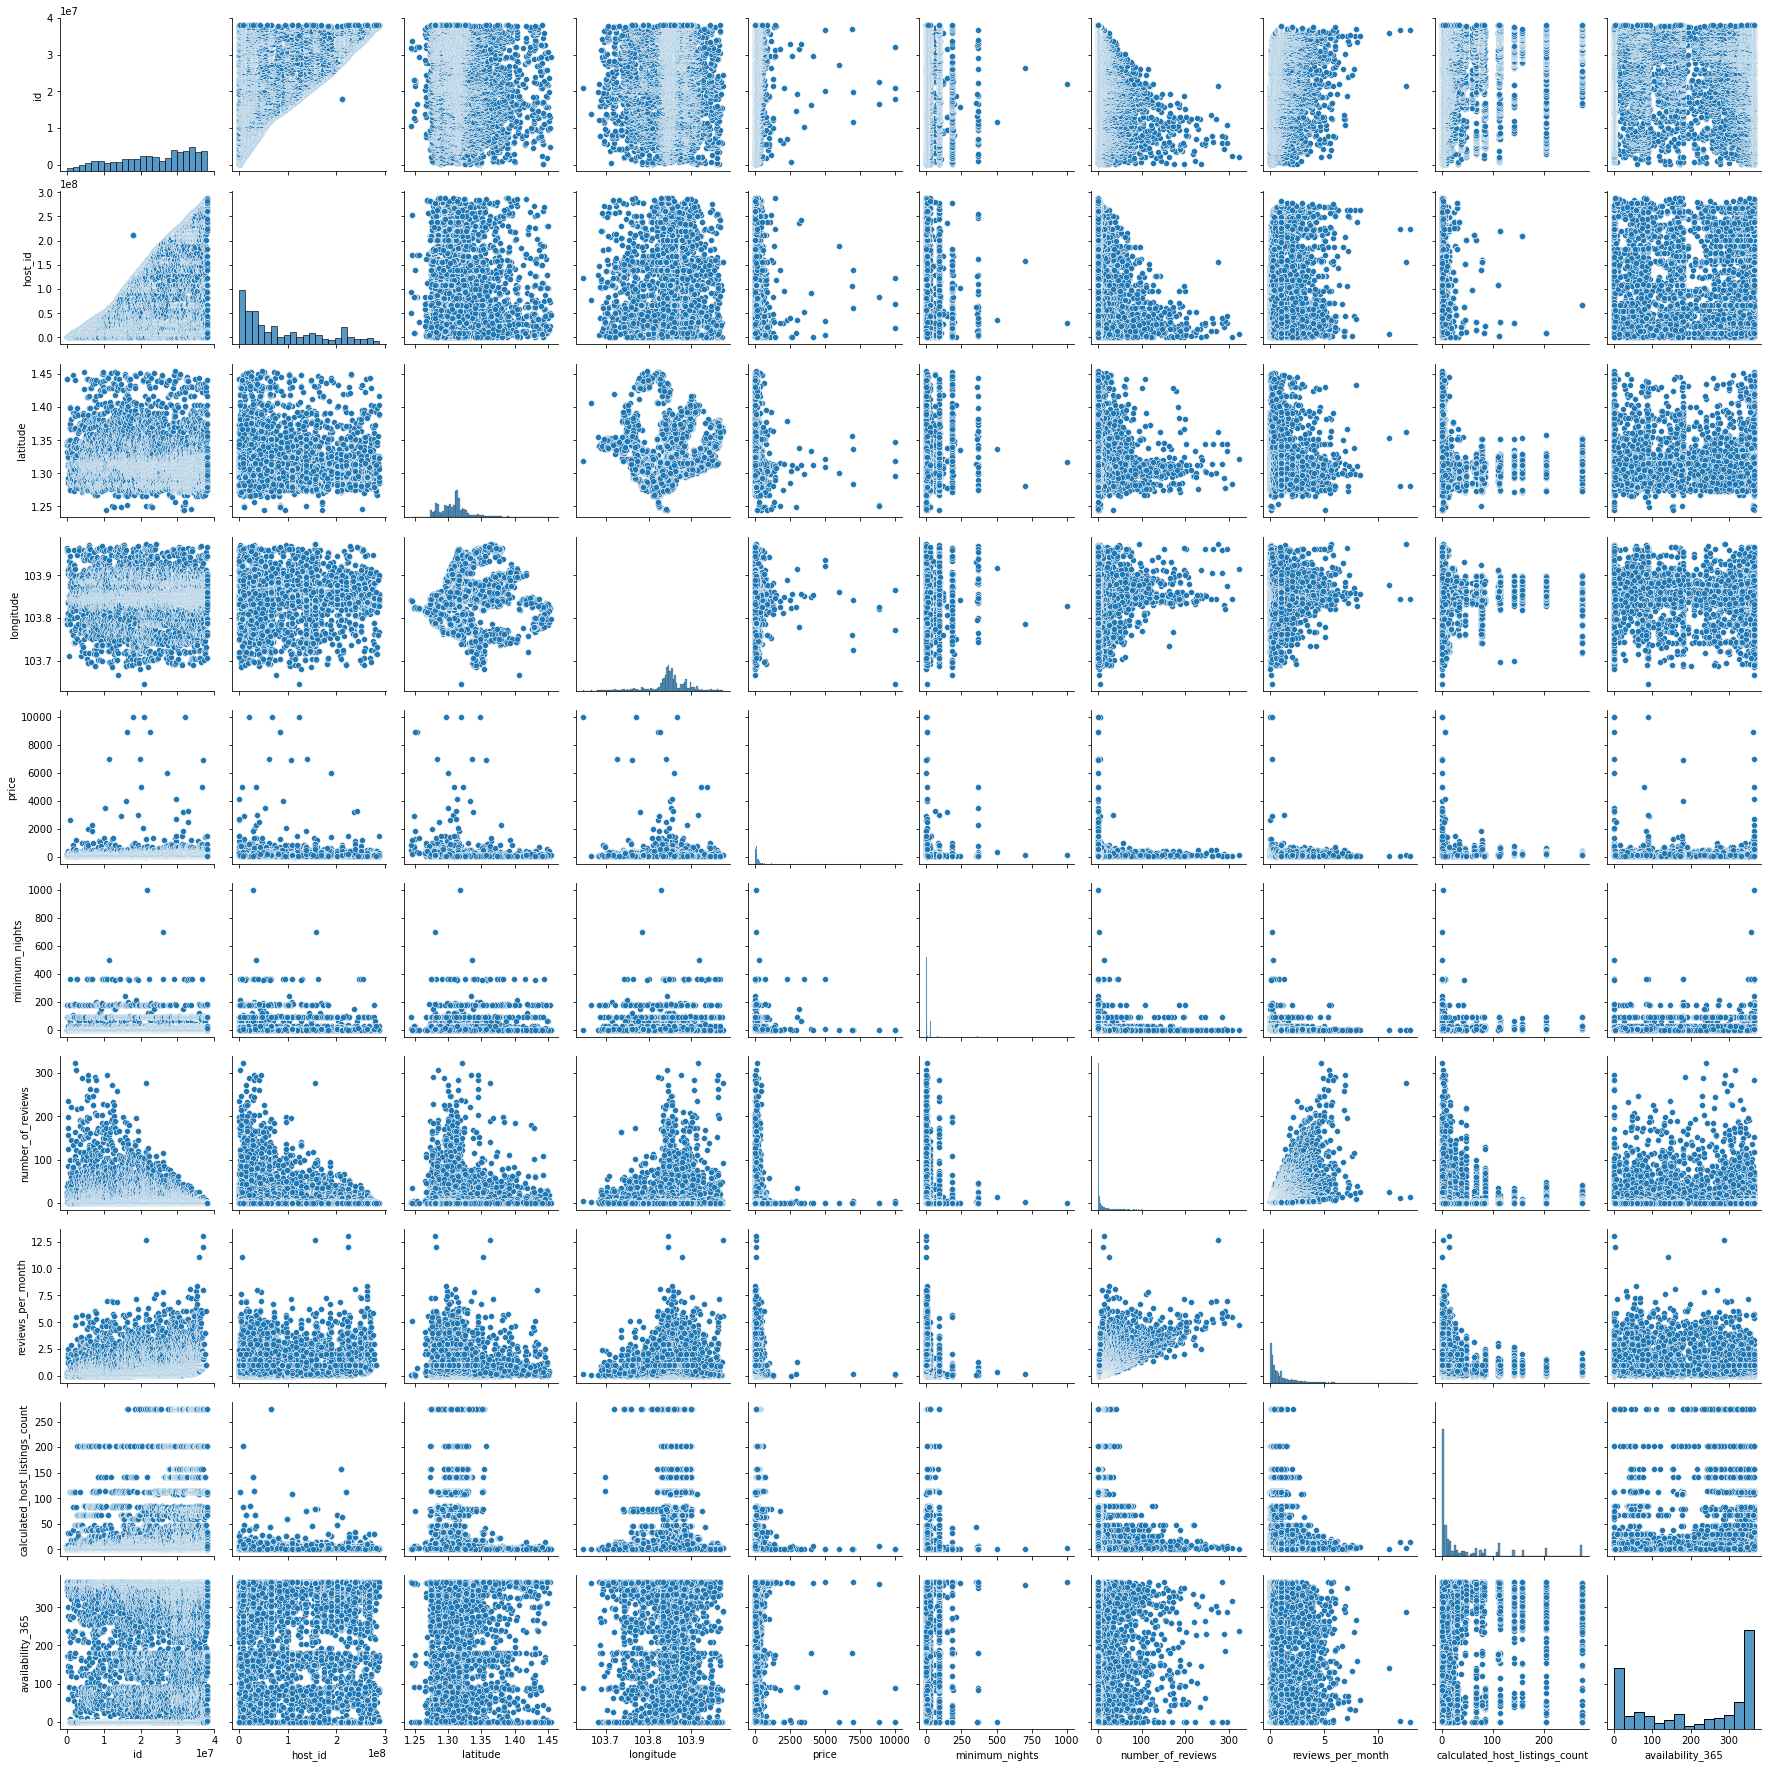

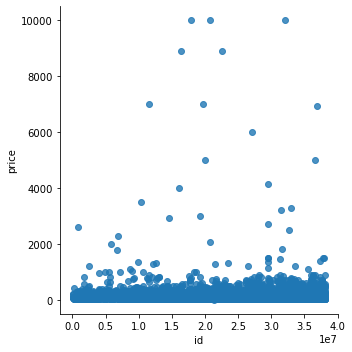

In [43]:
sb.pairplot(data)
sb.lmplot("id", "price", data = data)
plt.show()

Predict new data & evaluate the model

In [49]:
y3_pred = results3.predict(x3_test)

print("MAE : ", mean_absolute_error(y3_test, y3_pred))
print("MSE : ", mean_squared_error(y3_test, y3_pred))
print("R2 : ", r2_score(y3_test, y3_pred))

MAE :  111.04126048360138
MSE :  178425.2643515492
R2 :  0.001101261230071815


MAE dari data prediksi adalah 111.04126048360138, MSE nya 178425.2643515492 dan R^2 nya 0.001101261230071815. Saya rasa dataset ini tidak cocok untuk model regresi linear.